In [3]:
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.12.0


class labels

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4422102/4422102 [==============================] - 0s 0us/step


dataset details

In [6]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


sample image;Colorbars are a visualization of the mapping from scalar values to colors.

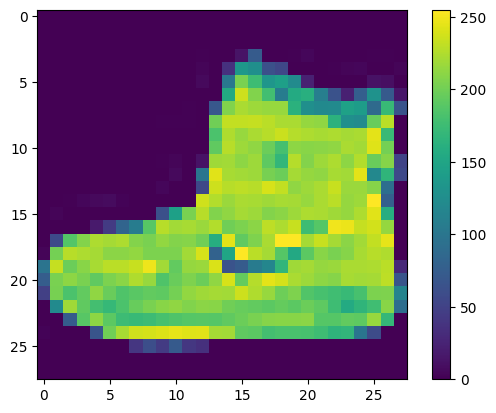

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

developoing model and training

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.9259 - accuracy: 0.7678
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5143 - accuracy: 0.8235
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4698 - accuracy: 0.8352
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4398 - accuracy: 0.8442
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4059 - accuracy: 0.8544
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3866 - accuracy: 0.8623
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3791 - accuracy: 0.8657
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3682 - accuracy: 0.8679
Epoch 9/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3522 - accuracy: 0.8741
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [8]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100 * np.max(predictions_array),
                                          class_names[true_label]),
               color=color)

313/313 [==============================] - 1s 2ms/step
[2.1111626e-11 9.0791585e-10 0.0000000e+00 3.2313943e-10 0.0000000e+00
 7.4142334e-03 4.9381990e-26 7.1828775e-02 4.7507824e-09 9.2075700e-01]
9


In [9]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


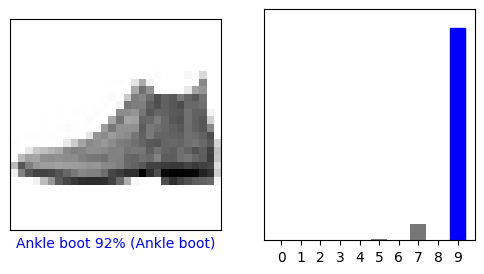

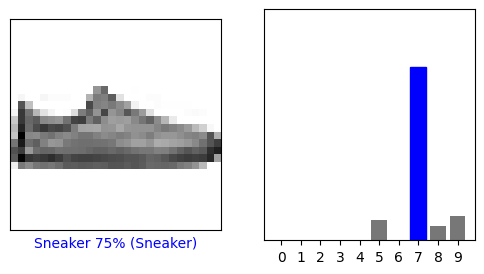

In [10]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

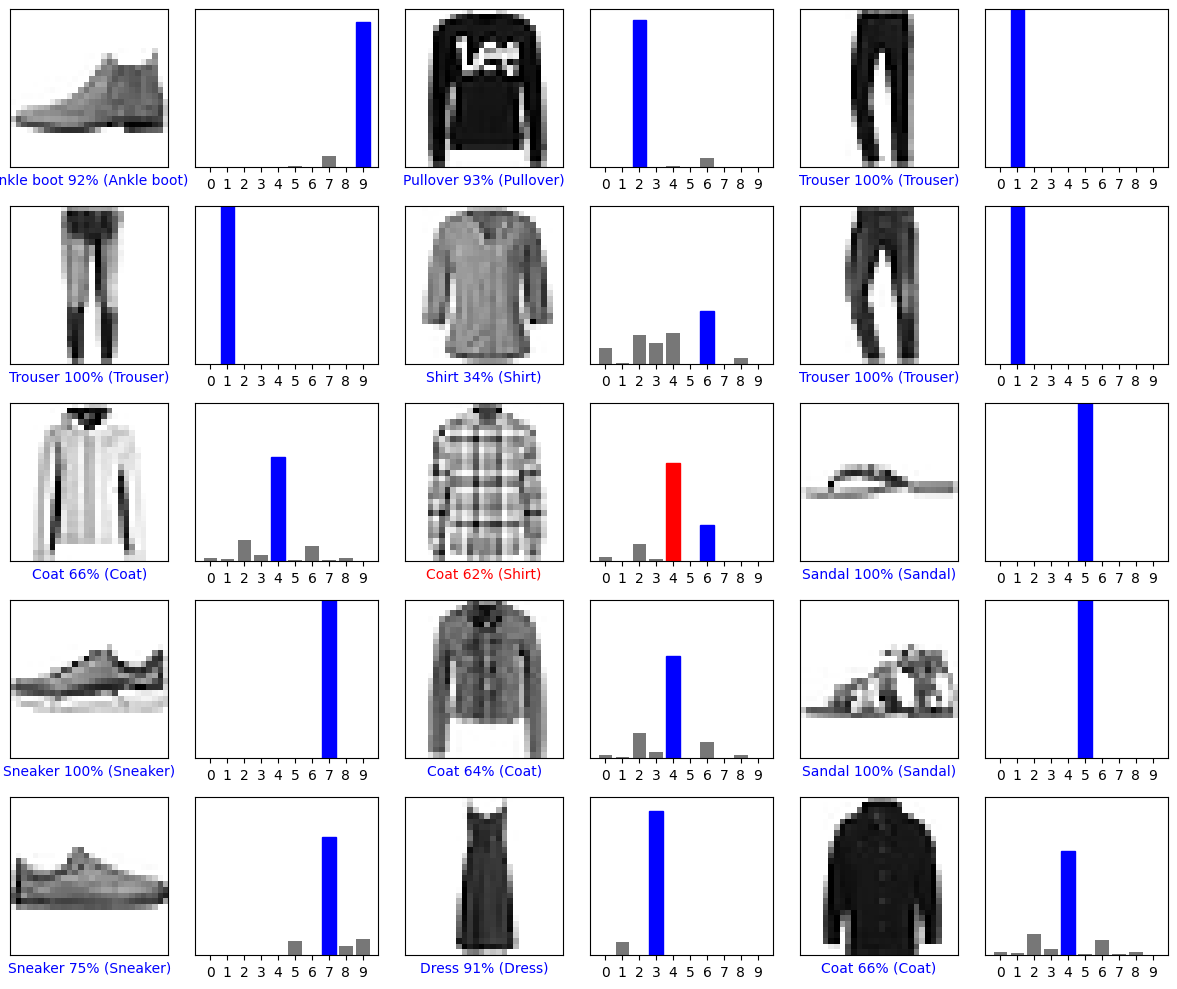

In [11]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 38ms/step
[[3.0344718e-03 1.4602222e-08 9.3042672e-01 3.5317219e-04 1.0028929e-02
  9.4791842e-20 5.5770177e-02 0.0000000e+00 3.8655510e-04 8.8966554e-27]]


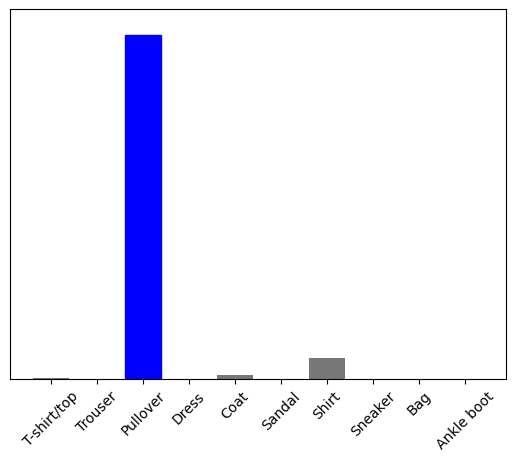

2


In [12]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print(img.shape)
predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
print(np.argmax(predictions_single[0]))
